# Background

We measured aesthetic preferences with a two-alternative forced choice task (2-AFC).  On each trial, subjects saw two images and asked to select the one they preferred with a keypress.  To ensure that subjects were paying attention, we randomly included trials in which the subject had to select the larger number between two images of numbers. 

This task was completed on six separate occasions.  For ease of reference, we refer to each of these occasions numerically by session.  Each session was one week apart, except for Session 1, which consisted of two separate 2-AFC tasks, roughly 20 minutes apart, referred to as Session 1A and Session 1B respectively.

In Session 1A, after providing consent and debriefing, participants began by completing a 2-AFC task on images of cars, shirts, and phone cases in three separate blocks, one for each category of objects.  The order of these blocks was counter-balanced across subjects.  Each block consisted of a total of 105 unique comparisons, presented in random order.  After completing all 3 blocks, subjects were given a digit-span memory task lasting roughly 20 minutes.  Immediately after, in Session 1B, participants again completed the same 2-AFC preference task as before.  Therefore, the first two preference measurements were 20 minutes apart.  The digit span task was given in between in order mitigate any short-term memory effects.  In addition, participants were given explicit instructions to complete all preference tasks based on their preference at that very moment, and not based on memory of previous choices.  After completing both parts of the first session, participants were required to return on a weekly interval for 4 weeks.  At each following session, participants were administered the same 2-AFC preference task, with the same procedure as Session 1B.

Session 6: Association Valence and Psychological Surveys
One week after completion of Sessions 1 - 5, participants were asked to return for a final follow up aesthetic-preference session.  Here, participants completed a Unique Corporate Association Valence  task (Spears et al., 2006; Schepman et al., 2015).  In this task, participants received the following instructions: 
“Please write a word or short description in the boxes below of any thoughts that the image brings to mind.  Please try not to use colors in the descriptions. Type your responses in the three boxes and then please indicate how positive, neutral, or negative the description is to you.” 

In response, participants provided three associations for each object.  Then, participants rated each of the associations on a subjective valence scale ranging from -3 to +3.  This association task was only conducted with images of cars and shirts due to time limitations. 

After completing the valence association tasks, participants filled out three psychological surveys.  They were the Barrat Impulsivity Test (Stanford et al., 2009), the revised Green et al., Paranoid Thoughts Scale (Freeman et al., 2021), and the General Anxiety Disorder-7 Questionnaire (Spitzer et al., 2006). To ensure that subjects were paying attention, each of the surveys included mock questions that required subjects to click a predefined option.




# Aim

Compute initial ranks for each item for each subject and use them to determine if there is an 'aesthetic distance' between comparisons and how that compares to actual distance between hues, as well as with overall aesthetic instability

# Load

In [1]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from math import pi
from itertools import combinations_with_replacement
import pickle
from IPython.display import display
pd.set_option('display.max_rows', 150)
# pd.set_option('display.max_columns', None)
from natsort import natsorted
import seaborn as sns
import scipy.stats as stats 
from collections import Counter
from itertools import groupby
from operator import itemgetter
from itertools import combinations
import time
import datetime
import choix
import plotly.graph_objects as go
from tqdm import tqdm
import glob
getInt=lambda x: int(re.findall(re.compile('\d+'),x)[0])
def getModulo(lint,rint):
    lin_dis=np.abs(lint-rint)
    mod_dis=(15-np.max([lint,rint]))+np.min([lint,rint])
    return(min([lin_dis,mod_dis]))


In [2]:
allCounts=pd.read_csv(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\ForR\SCP\CSV\allCounts.csv")
allDiffs=pd.read_csv(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\ForR\SCP\CSV\allDiffs.csv")
allDiffsSummary_Consecutive=pd.read_csv(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\ForR\SCP\CSV\allDiffsSummary_Consecutive.csv")
allDiffsSummary_Fixed=pd.read_csv(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\ForR\SCP\CSV\allDiffsSummary_Fixed.csv")
allCountsSummary=pd.read_csv(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\ForR\SCP\CSV\allCountsSummary.csv")
allPairsTogether=pd.read_csv(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\ForR\SCP\CSV\newAllPairsTogether.csv")
ratingsMelt=pd.read_csv(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\ForR\SCP\CSV\ratingsMelt.csv")
allPairsDistance=pd.read_csv(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\age_DataFiles\Rfiles\allPairsDistance_all.csv")
allPairsDistance_AF=pd.read_csv(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\age_DataFiles\Rfiles\allPairsDistance_AF.csv")
allPairsDistance_CON=pd.read_csv(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\age_DataFiles\Rfiles\allPairsDistance_CON.csv")

In [34]:
# allPairsTogether.to_csv(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\ForR\SCP\CSV\newAllPairsTogether.csv",index=False)
#saving again because removing sub 84 (subsortAF 96)
# saving w/ ranks

In [3]:
finalSubs=['sub'+str(i) for i in np.concatenate([np.arange(1,84),np.arange(85,97)])]#removed 84 which is random
os.chdir(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\Data_Files\scp\Visit5\pickle")
#subject class for loading
class Subject():
    def __init__(self,subname):
        self.subname=subname
#load
Subs={}
for i in tqdm(finalSubs):
    with open(i+'.pkl', 'rb') as input:
        Subs[i] = pickle.load(input)

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [00:13<00:00,  7.27it/s]


# compute initial ranks at session 1A

In [11]:
allCounts.groupby(['subnum','session','category']).get_group((1,'s1','Shirts'))

,count,subname,subnum,session,category,hue
0,4,sub1,1,s1,Shirts,1
1,0,sub1,1,s1,Shirts,2
2,1,sub1,1,s1,Shirts,3
3,3,sub1,1,s1,Shirts,4
4,6,sub1,1,s1,Shirts,5
5,6,sub1,1,s1,Shirts,6
6,5,sub1,1,s1,Shirts,7
7,12,sub1,1,s1,Shirts,8
8,8,sub1,1,s1,Shirts,9
9,7,sub1,1,s1,Shirts,10


In [9]:
stats.rankdata(allCounts.groupby(['subnum','session','category']).get_group((1,'s1','Shirts'))['count'])

array([ 4. ,  1. ,  2. ,  3. ,  7.5,  7.5,  5.5, 13. , 10. ,  9. , 11. ,
       12. , 14. , 15. ,  5.5])

In [15]:
len(initialRanksDF)

4275

In [17]:
4275/95

45.0

In [5]:
shirts=['t_'+str(i) for i in np.arange(1,16)]
cars=['c'+str(i) for i in np.arange(1,16)]
phones=['p'+str(i) for i in np.arange(1,16)]
stimList=[item for sublist in [shirts,cars,phones] for item in sublist]

In [6]:
initialRanksDF=pd.DataFrame()
initialRanksDF['subname']=np.repeat(finalSubs,45)
initialRanksDF['category']=np.tile(np.repeat(['Shirts','Cars','Phones'],15),95)
initialRanksDF['subnum']=[getInt(i) for i in initialRanksDF['subname']]
initialRanksDF['stim']=np.tile(stimList,95)

In [7]:
initialRanksDF.loc[0]['subnum']

1

In [12]:
initialRanks=[]
for i in finalSubs:
    for k in ['Shirts','Cars','Phones']:
    
        initialRanks.append(stats.rankdata(allCounts.groupby(['subnum','session','category']).get_group((getInt(i),'s1',k))['count']))

This was not the fastest way to do this...

In [13]:
initialRanksDF['initialRanks']=[item for sublist in initialRanks for item in sublist]

In [14]:
initialRanksDF.loc[0:25]

,subname,category,subnum,stim,initialRanks
0,sub1,Shirts,1,t_1,4.0
1,sub1,Shirts,1,t_2,1.0
2,sub1,Shirts,1,t_3,2.0
3,sub1,Shirts,1,t_4,3.0
4,sub1,Shirts,1,t_5,7.5
5,sub1,Shirts,1,t_6,7.5
6,sub1,Shirts,1,t_7,5.5
7,sub1,Shirts,1,t_8,13.0
8,sub1,Shirts,1,t_9,10.0
9,sub1,Shirts,1,t_10,9.0


In [61]:
allPairsTogether.head()

,value,timepoint,subname,Limg,Rimg,Lint,Rint,diff,pair,category,class,subnum,subSortAF,change
0,0,AB,sub1,t_11,t_3,11,3,7,"11,3",shirt,Fixed,1,9,No
1,0,AB,sub1,t_2,t_3,2,3,1,"2,3",shirt,Fixed,1,9,No
2,0,AB,sub1,t_12,t_6,12,6,6,"12,6",shirt,Fixed,1,9,No
3,0,AB,sub1,t_14,t_5,14,5,6,"14,5",shirt,Fixed,1,9,No
4,0,AB,sub1,t_4,t_6,4,6,2,"4,6",shirt,Fixed,1,9,No


In [82]:
foo=dict((initialRanksDF.groupby(['subname','category']).get_group(('sub1','Shirts')))[['stim','initialRanks']].values)

In [84]:
boo=allPairsTogether.groupby(['subname','category']).get_group(('sub1','shirt'))

In [27]:
class InitDict:
    def __init__(self,name):
        
        #make rank to stim dict
        self.ShirtsDict=dict((initialRanksDF.groupby(['subname','category']).get_group((name,'Shirts')))[['stim','initialRanks']].values)
        self.CarsDict=dict((initialRanksDF.groupby(['subname','category']).get_group((name,'Cars')))[['stim','initialRanks']].values)
        self.PhonesDict=dict((initialRanksDF.groupby(['subname','category']).get_group((name,'Phones')))[['stim','initialRanks']].values)
        
        #grab relevant portion
        self.ShirtsDF=allPairsTogether.groupby(['subname','category']).get_group((name,'shirt'))[['Limg','Rimg']]
        self.CarsDF=allPairsTogether.groupby(['subname','category']).get_group((name,'car'))[['Limg','Rimg']]
        self.PhonesDF=allPairsTogether.groupby(['subname','category']).get_group((name,'phone'))[['Limg','Rimg']]
        
        #extract
        self.Shirts_Limg=self.ShirtsDF['Limg']
        self.Shirts_Lrank=[self.ShirtsDict[i] for i in self.Shirts_Limg]
        self.Shirts_Rimg=self.ShirtsDF['Rimg']
        self.Shirts_Rrank=[self.ShirtsDict[i] for i in self.Shirts_Rimg]
        
        self.Cars_Limg=self.CarsDF['Limg']
        self.Cars_Lrank=[self.CarsDict[i] for i in self.Cars_Limg]
        self.Cars_Rimg=self.CarsDF['Rimg']
        self.Cars_Rrank=[self.CarsDict[i] for i in self.Cars_Rimg]
        
        self.Phones_Limg=self.PhonesDF['Limg']
        self.Phones_Lrank=[self.PhonesDict[i] for i in self.Phones_Limg]
        self.Phones_Rimg=self.PhonesDF['Rimg']
        self.Phones_Rrank=[self.PhonesDict[i] for i in self.Phones_Rimg]
        


In [20]:
allPairsTogether=allPairsTogether.loc[allPairsTogether['subname']!='sub84']

In [28]:
Lrank=[]
Rrank=[]

for i in tqdm(np.unique(allPairsTogether.subname)):
    Lrank.append([InitDict(i).Shirts_Lrank,
                  InitDict(i).Cars_Lrank,
                  InitDict(i).Phones_Lrank])
    Rrank.append([InitDict(i).Shirts_Rrank,
              InitDict(i).Cars_Rrank,
              InitDict(i).Phones_Rrank])

 14%|███████████▏                                                                      | 13/95 [00:18<01:58,  1.45s/it]


KeyboardInterrupt: 

In [30]:
allPairsTogether['Lrank']=[item for sublist in [item for sublist in Lrank for item in sublist] for item in sublist]
allPairsTogether['Rrank']=[item for sublist in [item for sublist in Rrank for item in sublist] for item in sublist]

C:\Users\al33m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\al33m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
allPairsTogether.head()

,value,timepoint,subname,Limg,Rimg,Lint,Rint,diff,pair,category,class,subnum,subSortAF,change,Lrank,Rrank
0,0,AB,sub1,t_11,t_3,11,3,7,"11,3",shirt,Fixed,1,9,No,11.0,2.0
1,0,AB,sub1,t_2,t_3,2,3,1,"2,3",shirt,Fixed,1,9,No,1.0,2.0
2,0,AB,sub1,t_12,t_6,12,6,6,"12,6",shirt,Fixed,1,9,No,12.0,7.5
3,0,AB,sub1,t_14,t_5,14,5,6,"14,5",shirt,Fixed,1,9,No,15.0,7.5
4,0,AB,sub1,t_4,t_6,4,6,2,"4,6",shirt,Fixed,1,9,No,3.0,7.5


In [32]:
allPairsTogether['rankDiff']=np.abs(allPairsTogether['Lrank']-allPairsTogether['Rrank'])

C:\Users\al33m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
allPairsTogether.head()

,value,timepoint,subname,Limg,Rimg,Lint,Rint,diff,pair,category,class,subnum,subSortAF,change,Lrank,Rrank,rankDiff
0,0,AB,sub1,t_11,t_3,11,3,7,"11,3",shirt,Fixed,1,9,No,11.0,2.0,9.0
1,0,AB,sub1,t_2,t_3,2,3,1,"2,3",shirt,Fixed,1,9,No,1.0,2.0,1.0
2,0,AB,sub1,t_12,t_6,12,6,6,"12,6",shirt,Fixed,1,9,No,12.0,7.5,4.5
3,0,AB,sub1,t_14,t_5,14,5,6,"14,5",shirt,Fixed,1,9,No,15.0,7.5,7.5
4,0,AB,sub1,t_4,t_6,4,6,2,"4,6",shirt,Fixed,1,9,No,3.0,7.5,4.5


In [48]:
InitDict('sub7').ShirtsDict

{'t_1': 10.0,
 't_2': 1.0,
 't_3': 2.0,
 't_4': 3.0,
 't_5': 8.0,
 't_6': 12.5,
 't_7': 4.5,
 't_8': 6.5,
 't_9': 6.5,
 't_10': 12.5,
 't_11': 15.0,
 't_12': 14.0,
 't_13': 10.0,
 't_14': 10.0,
 't_15': 4.5}

In [205]:
allPairsTogether_fixed.groupby('subname').get_group('sub1').loc[0:50]

,value,timepoint,subname,Limg,Rimg,Lint,Rint,diff,pair,category,class,subnum,subSortAF,change,Lrank,Rrank,rankDiff
0,0,AB,sub1,t_11,t_3,11,3,7,"11,3",shirt,Fixed,1,9,No,11.0,2.0,9.0
1,0,AB,sub1,t_2,t_3,2,3,1,"2,3",shirt,Fixed,1,9,No,1.0,2.0,1.0
2,0,AB,sub1,t_12,t_6,12,6,6,"12,6",shirt,Fixed,1,9,No,12.0,7.5,4.5
3,0,AB,sub1,t_14,t_5,14,5,6,"14,5",shirt,Fixed,1,9,No,15.0,7.5,7.5
4,0,AB,sub1,t_4,t_6,4,6,2,"4,6",shirt,Fixed,1,9,No,3.0,7.5,4.5
5,0,AB,sub1,t_10,t_14,10,14,4,"10,14",shirt,Fixed,1,9,No,9.0,15.0,6.0
6,0,AB,sub1,t_13,t_2,13,2,4,"13,2",shirt,Fixed,1,9,No,14.0,1.0,13.0
7,0,AB,sub1,t_13,t_3,13,3,5,"13,3",shirt,Fixed,1,9,No,14.0,2.0,12.0
8,0,AB,sub1,t_6,t_9,6,9,3,"6,9",shirt,Fixed,1,9,No,7.5,10.0,2.5
9,0,AB,sub1,t_12,t_4,12,4,7,"12,4",shirt,Fixed,1,9,No,12.0,3.0,9.0


# Analyze

In [36]:
allPairsTogether_fixed=allPairsTogether.loc[allPairsTogether['class']=='Fixed']

In [40]:
allPairsTogether_fixed.groupby('diff').agg({'rankDiff':'mean'})#mean rankdiff for each diff

,rankDiff
diff,
1,5.050807
2,5.271556
3,5.328070
4,5.279977
5,5.341684
6,5.332468
7,5.284561


the range is small here because affective distance is not the same for everyone. An initial rank of 1 for shirt 1, may be an initial rank of 15 for another person

In [191]:
allPairsTogether_fixed.groupby('diff').agg({'rankDiff':'mean'})

,rankDiff
diff,
1,5.050807
2,5.271556
3,5.328070
4,5.279977
5,5.341684
6,5.332468
7,5.284561


Text(0, 0.5, 'Initial Rank Differenec between Pair')

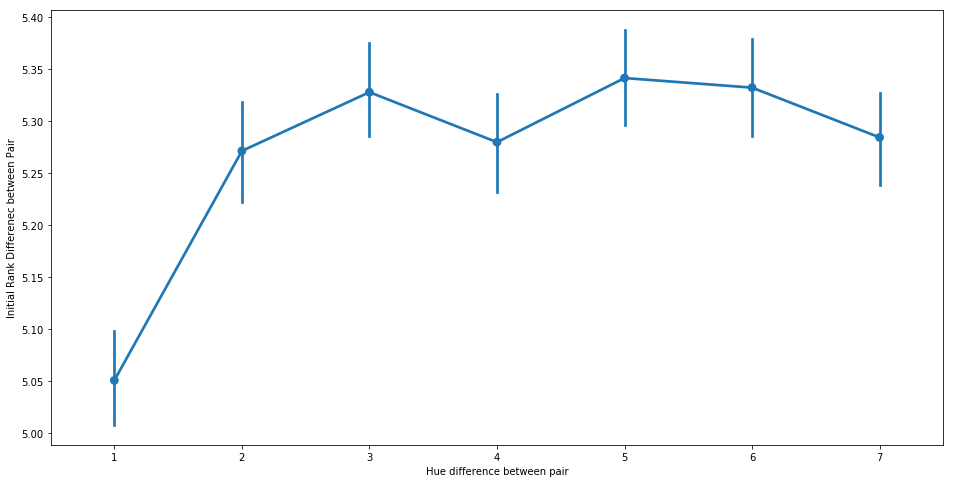

In [49]:
plt.figure(figsize=(16,8))

sns.pointplot(x='diff',y='rankDiff',data=allPairsTogether_fixed)
plt.xlabel('Hue difference between pair')
plt.ylabel('Initial Rank Differenec between Pair')

# plt.figure(figsize=(16,8))

# sns.pointplot(x='diff',y='rankDiff',hue='category',data=allPairsTogether_fixed)
# plt.xlabel('Hue difference between pair')
# plt.ylabel('Initial Rank Differenec between Pair')


- shows how rank diff correlated with hue difference
- Expected more of a dip to happen as a lot of times opposites attract, but in general this graph also shows why the floor effect occurs. There is a similar 'affective distance' between those that 1 and 2 apart versus those that are 3-7 apart
- the range of ranks is lower than expected, between 5.1 and 5.3.. indicates 

# Overall Ranks

What if look at overall mean ranks?

In [84]:
initialRankMat=pd.DataFrame(initialRanks)

In [85]:
initialRankMat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4.0,1.0,2.0,3.0,7.5,7.5,5.5,13.0,10.0,9.0,11.0,12.0,14.0,15.0,5.5
1,4.0,1.0,2.0,3.0,5.5,7.0,5.5,10.5,10.5,8.0,10.5,13.0,15.0,14.0,10.5
2,6.0,2.5,1.0,2.5,4.0,6.0,6.0,9.5,9.5,9.5,12.0,13.0,15.0,14.0,9.5
3,8.0,7.0,3.0,1.0,3.0,3.0,5.5,5.5,10.0,11.0,14.0,14.0,14.0,12.0,9.0
4,9.0,8.0,3.0,4.5,1.0,2.0,4.5,7.0,10.0,11.5,14.0,15.0,13.0,11.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,7.5,3.5,7.5,9.5,12.5,14.5,14.5,9.5,12.5,11.0,6.0,1.0,3.5,3.5,3.5
281,10.0,10.0,6.5,12.0,13.0,15.0,14.0,6.5,10.0,6.5,6.5,2.5,1.0,2.5,4.0
282,10.5,3.5,2.0,1.0,8.5,6.0,6.0,3.5,6.0,8.5,10.5,13.0,13.0,13.0,15.0
283,15.0,1.5,4.0,1.5,5.5,7.5,3.0,5.5,7.5,9.0,12.5,12.5,12.5,12.5,10.0


In [91]:
import itertools

In [95]:
initialRankMat.index=['_'.join(l) for l in itertools.product(finalSubs, ['shirts','cars','phones'])]

In [96]:
initialRankMat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sub1_shirts,4.0,1.0,2.0,3.0,7.5,7.5,5.5,13.0,10.0,9.0,11.0,12.0,14.0,15.0,5.5
sub1_cars,4.0,1.0,2.0,3.0,5.5,7.0,5.5,10.5,10.5,8.0,10.5,13.0,15.0,14.0,10.5
sub1_phones,6.0,2.5,1.0,2.5,4.0,6.0,6.0,9.5,9.5,9.5,12.0,13.0,15.0,14.0,9.5
sub2_shirts,8.0,7.0,3.0,1.0,3.0,3.0,5.5,5.5,10.0,11.0,14.0,14.0,14.0,12.0,9.0
sub2_cars,9.0,8.0,3.0,4.5,1.0,2.0,4.5,7.0,10.0,11.5,14.0,15.0,13.0,11.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub95_cars,7.5,3.5,7.5,9.5,12.5,14.5,14.5,9.5,12.5,11.0,6.0,1.0,3.5,3.5,3.5
sub95_phones,10.0,10.0,6.5,12.0,13.0,15.0,14.0,6.5,10.0,6.5,6.5,2.5,1.0,2.5,4.0
sub96_shirts,10.5,3.5,2.0,1.0,8.5,6.0,6.0,3.5,6.0,8.5,10.5,13.0,13.0,13.0,15.0
sub96_cars,15.0,1.5,4.0,1.5,5.5,7.5,3.0,5.5,7.5,9.0,12.5,12.5,12.5,12.5,10.0


In [102]:
hueMeanDict=dict(zip(np.arange(1,16),np.mean(initialRankMat,axis=0)))

In [103]:
allPairsTogether_fixed.head()

,value,timepoint,subname,Limg,Rimg,Lint,Rint,diff,pair,category,class,subnum,subSortAF,change,Lrank,Rrank,rankDiff
0,0,AB,sub1,t_11,t_3,11,3,7,"11,3",shirt,Fixed,1,9,No,11.0,2.0,9.0
1,0,AB,sub1,t_2,t_3,2,3,1,"2,3",shirt,Fixed,1,9,No,1.0,2.0,1.0
2,0,AB,sub1,t_12,t_6,12,6,6,"12,6",shirt,Fixed,1,9,No,12.0,7.5,4.5
3,0,AB,sub1,t_14,t_5,14,5,6,"14,5",shirt,Fixed,1,9,No,15.0,7.5,7.5
4,0,AB,sub1,t_4,t_6,4,6,2,"4,6",shirt,Fixed,1,9,No,3.0,7.5,4.5


In [105]:
allPairsTogether_fixed['meanLrank']=[hueMeanDict[i] for i in allPairsTogether_fixed['Lint']]
allPairsTogether_fixed['meanRrank']=[hueMeanDict[i] for i in allPairsTogether_fixed['Rint']]

C:\Users\al33m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\al33m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
allPairsTogether_fixed['meanRankDiff']=np.abs(allPairsTogether_fixed['meanRrank']-allPairsTogether_fixed['meanLrank'])

C:\Users\al33m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
allPairsTogether_fixed.head()

,value,timepoint,subname,Limg,Rimg,Lint,Rint,diff,pair,category,class,subnum,subSortAF,change,Lrank,Rrank,rankDiff,meanLrank,meanRrank,meanRankDiff
0,0,AB,sub1,t_11,t_3,11,3,7,"11,3",shirt,Fixed,1,9,No,11.0,2.0,9.0,10.012281,5.438596,4.573684
1,0,AB,sub1,t_2,t_3,2,3,1,"2,3",shirt,Fixed,1,9,No,1.0,2.0,1.0,6.452632,5.438596,1.014035
2,0,AB,sub1,t_12,t_6,12,6,6,"12,6",shirt,Fixed,1,9,No,12.0,7.5,4.5,7.398246,7.722807,0.324561
3,0,AB,sub1,t_14,t_5,14,5,6,"14,5",shirt,Fixed,1,9,No,15.0,7.5,7.5,5.875439,7.457895,1.582456
4,0,AB,sub1,t_4,t_6,4,6,2,"4,6",shirt,Fixed,1,9,No,3.0,7.5,4.5,6.363158,7.722807,1.359649


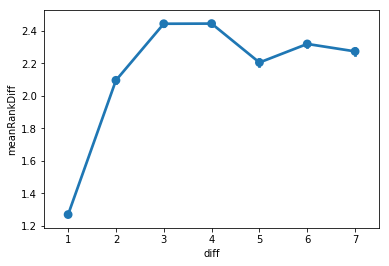

In [110]:
sns.pointplot('diff','meanRankDiff',data=allPairsTogether_fixed)

pretty much the same as above

looks like as meanRankDiff increases (ranks of images compared get further apart), the instabiilty decreases, meaning easier competition